In [34]:
import utils 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
df = pd.read_excel('../data/patsnap_data.xlsx', sheet_name='sheet1')

df.tail(3)

,Number,Publication Number,Title,Legal Status & Events,Current Assignee,Application Date,IPC,Patent Valuation,Abstract,Abstract_English,Claims,Title_English,CPC
9997,9998,CN205864058U,A redundancy power supply for unmanned aerial ...,Non-payment,深圳光启空间技术有限公司,2016-07-14,H02J9/06,-,The utility model discloses a redundancy power...,The utility model discloses a redundancy power...,1.一种用于无人机系统的冗余电源，其特征在于，包括：_x000D_\n电源保护模块，与电源模...,A redundancy power supply for unmanned aerial ...,-
9998,9999,GB2377683A,Composite of unmanned aerial vehicles,Withdrawn-Undetermined,BAE SYSTEMS PLC,2001-07-20,B64D7/08 | B64D5/00 | B64C39/02 | F42B15/36 | ...,-,The aerial vehicle comprises a plurality of UA...,The aerial vehicle comprises a plurality of UA...,Claims_x000D_\n1 An aerial vehicle comprising ...,Composite of unmanned aerial vehicles,B64C39/024 | B64C2201/082 | B64C2201/102 | B64...
9999,10000,CN107222697A,Video overlapping module applied to unmanned a...,Rejected,吉林化工学院,2017-06-30,H04N5/445 | H04N7/18,-,The invention discloses a video overlapping mo...,The invention discloses a video overlapping mo...,1.一种应用在无人机上的视频叠加模块，其特征在于，该视频叠加模块介于摄像监控设备和图像传输系...,Video overlapping module applied to unmanned a...,H04N5/44504 | H04N7/18


In [36]:
df.dtypes

Number                    int64
Publication Number       object
Title                    object
Legal Status & Events    object
Current Assignee         object
Application Date         object
IPC                      object
Patent Valuation         object
Abstract                 object
Abstract_English         object
Claims                   object
Title_English            object
CPC                      object
dtype: object

In [37]:
df['Application Date'] = pd.to_datetime(df['Application Date'])

In [38]:
grouped_df = df.groupby(df['Application Date'].dt.year).size().reset_index(name='COUNT')


grouped_df

,Application Date,COUNT
0,1968,1
1,1988,1
2,1992,2
3,1994,1
4,1995,3
5,1996,2
6,1997,3
7,1998,1
8,1999,3
9,2000,3


In [39]:
def calculate_cumulative_count(data: pd.DataFrame):
    """
    Calculate the cumulative count of patent applications per year for all categories.

    """
    applications_per_year = df.groupby(df['Application Date'].dt.year).size().reset_index(name='Applications_Per_Year')
    applications_per_year['Cumulative_Count'] = applications_per_year['Applications_Per_Year'].cumsum()
    
    return applications_per_year

cumulative_count = calculate_cumulative_count(df)

# Print the cumulative count of patent applications per year
cumulative_count

,Application Date,Applications_Per_Year,Cumulative_Count
0,1968,1,1
1,1988,1,2
2,1992,2,4
3,1994,1,5
4,1995,3,8
5,1996,2,10
6,1997,3,13
7,1998,1,14
8,1999,3,17
9,2000,3,20


In [40]:
cumulative_count.dtypes

Application Date         int64
Applications_Per_Year    int64
Cumulative_Count         int64
dtype: object

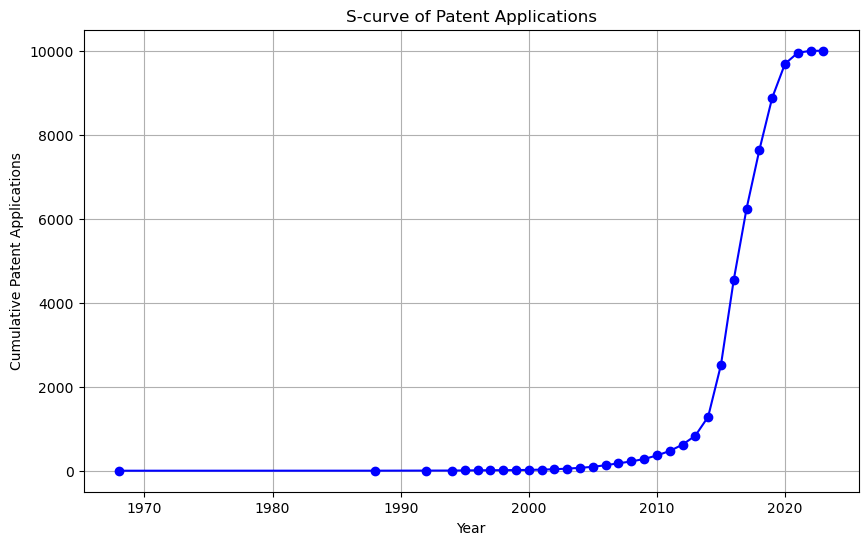

In [41]:
def plot_s_curve(data: pd.DataFrame, y_axis: str):
    """
    Plot the S-curve of patent applications.

    Parameters:
    - data: DataFrame containing the cumulative count of patent applications per year
    - y_axis: Name of the column in the DataFrame to use as the y-axis data
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data['Application Date'].astype(int), data[y_axis], marker='o', linestyle='-', color='b')
    plt.title('S-curve of Patent Applications')
    plt.xlabel('Year')
    plt.ylabel('Cumulative Patent Applications')
    plt.grid(True)
    plt.show()

plot_s_curve(cumulative_count, 'Cumulative_Count')

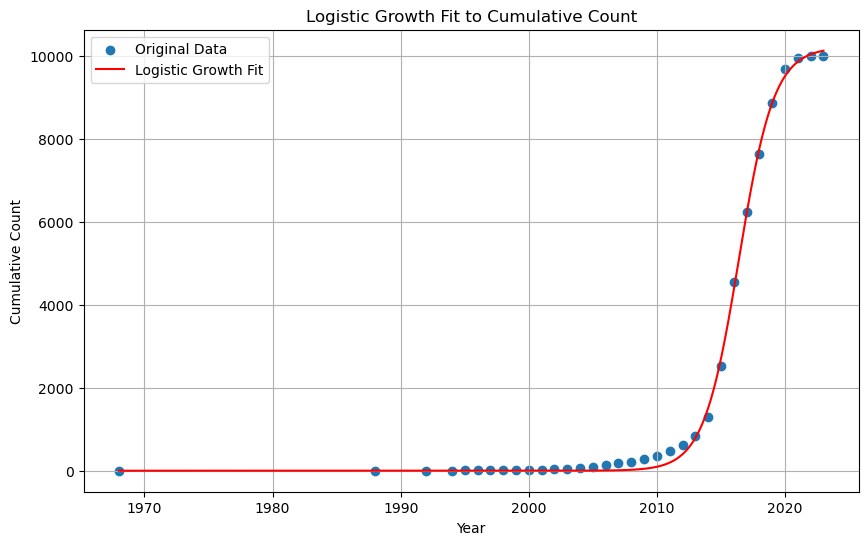

Estimated parameters:
L (Carrying Capacity): 10217.307978795081
k (Growth Rate): 0.7277952499362141
x0 (Inflection Point): 2016.4060318663342


In [42]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Assuming your DataFrame is stored in a variable called cumulative_count

# Define the logistic growth function
def logistic_growth(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Convert your data into numpy arrays
x_data = np.array(cumulative_count['Application Date'])
y_data = np.array(cumulative_count['Cumulative_Count'])

# Initial guess for the parameters
initial_guess = (max(y_data), 1, np.mean(x_data))

# Fit the curve to the data
params, covariance = curve_fit(logistic_growth, x_data, y_data, p0=initial_guess)

# Extract the parameters
L, k, x0 = params

# Generate points for the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 1000)
y_fit = logistic_growth(x_fit, L, k, x0)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_fit, y_fit, 'r-', label='Logistic Growth Fit')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.title('Logistic Growth Fit to Cumulative Count')
plt.legend()
plt.grid(True)
plt.show()

print("Estimated parameters:")
print("L (Carrying Capacity):", L)
print("k (Growth Rate):", k)
print("x0 (Inflection Point):", x0)

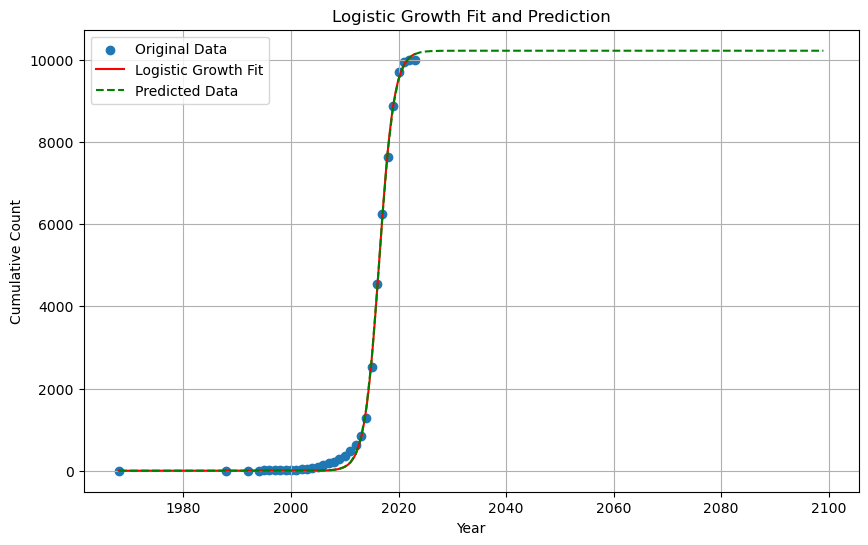

In [43]:
# Define the years for prediction
years_future = np.arange(1968, 2100)  # Assuming your data starts from 1968 and you want to predict up to 2100

# Predict the cumulative count using the logistic growth function
cumulative_count_predicted = logistic_growth(years_future, L, k, x0)

# Plot the original data, fitted curve, and predicted data
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_fit, y_fit, 'r-', label='Logistic Growth Fit')
plt.plot(years_future, cumulative_count_predicted, 'g--', label='Predicted Data')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.title('Logistic Growth Fit and Prediction')
plt.legend()
plt.grid(True)
plt.show()


## S Curve

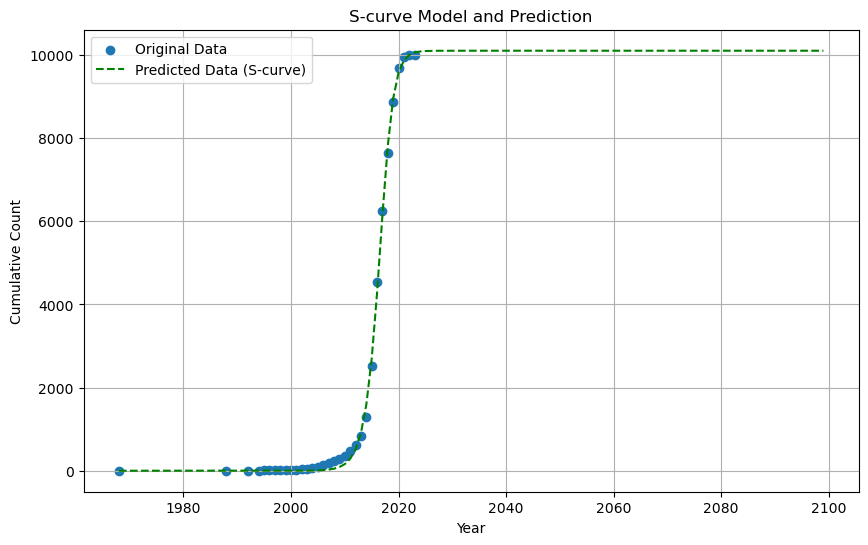

Estimated parameters for S-curve:
L (Carrying Capacity): 10105.733337721482
k (Growth Rate): 0.8574535906765189
x0 (Inflection Point): 2017.080524602038
b: 1.4622562694969783


In [44]:
from scipy.optimize import curve_fit

# Define the S-curve function
def s_curve(x, L, k, x0, b):
    return L / (1 + np.exp(-k * (x - x0))) ** (1/b)

# Initial guess for the parameters
initial_guess_s = (max(y_data), 1, np.mean(x_data), 1)

# Fit the curve to the data
params_s, covariance_s = curve_fit(s_curve, x_data, y_data, p0=initial_guess_s)

# Extract the parameters
L_s, k_s, x0_s, b_s = params_s

# Predict the cumulative count using the S-curve function
cumulative_count_predicted_s = s_curve(years_future, L_s, k_s, x0_s, b_s)

# Plot the original data, fitted curve, and predicted data
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(years_future, cumulative_count_predicted_s, 'g--', label='Predicted Data (S-curve)')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.title('S-curve Model and Prediction')
plt.legend()
plt.grid(True)
plt.show()

print("Estimated parameters for S-curve:")
print("L (Carrying Capacity):", L_s)
print("k (Growth Rate):", k_s)
print("x0 (Inflection Point):", x0_s)
print("b:", b_s)
